<a href="https://colab.research.google.com/github/tanishq252/Pneumodoc/blob/master/Pneumonia_detection_ANN_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:27<00:00, 46.0MB/s]
100% 2.29G/2.29G [00:27<00:00, 90.7MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip


In [ ]:

import os
import numpy as np
import pandas as pd 
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, SeparableConv2D, MaxPool2D, LeakyReLU, Activation
# from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

# seed = 232
# np.random.seed(seed)
# tf.set_random_seed(seed)

In [ ]:
cd

/root


In [ ]:
cd ..

/


In [ ]:
cd "content"

/content


In [ ]:
os.listdir()

['.config',
 'chest_xray',
 'chest-xray-pneumonia.zip',
 'kaggle.json',
 'sample_data']

In [ ]:
cd "chest_xray"

/content/chest_xray


In [ ]:
os.path

<module 'posixpath' from '/usr/lib/python3.7/posixpath.py'>

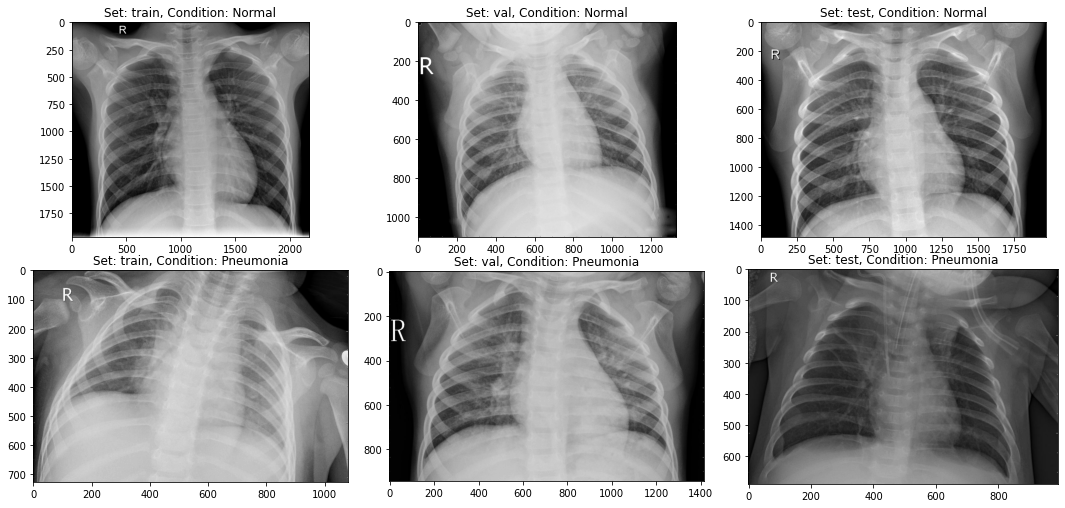

In [ ]:

input_path = '/content/chest_xray/'

fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()

for i, _set in enumerate(['train', 'val', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/NORMAL/'+os.listdir(set_path+'/NORMAL')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/PNEUMONIA/'+os.listdir(set_path+'/PNEUMONIA')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Pneumonia'.format(_set))

In [ ]:
def process_data(img_dims, batch_size):
    train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, vertical_flip=True)
    test_val_datagen = ImageDataGenerator(rescale=1./255)
    
    train_gen = train_datagen.flow_from_directory(
    directory=input_path+'train', 
    seed=7,
    target_size=(img_dims, img_dims), 
    batch_size=batch_size, 
    class_mode='binary', 
    shuffle=True)

    test_gen = test_val_datagen.flow_from_directory(
    seed=7,
    directory=input_path+'test', 
    target_size=(img_dims, img_dims), 
    batch_size=batch_size, 
    class_mode='binary', 
    shuffle=True)
    
   
    test_data = []
    test_labels = []

    for cond in ['/NORMAL/', '/PNEUMONIA/']:
        for img in (os.listdir(input_path + 'test' + cond)):
            img = plt.imread(input_path+'test'+cond+img)
            img = cv2.resize(img, (img_dims, img_dims))
            img = np.dstack([img, img, img])
            img = img.astype('float32') / 255
            if cond=='/NORMAL/':
                label = 0
            elif cond=='/PNEUMONIA/':
                label = 1
            test_data.append(img)
            test_labels.append(label)
        
    test_data = np.array(test_data)
    test_labels = np.array(test_labels)
    
    return train_gen, test_gen, test_data, test_labels

In [ ]:

img_dims = 150
epochs = 15
batch_size = 32

train_gen, test_gen, test_data, test_labels = process_data(img_dims, batch_size)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# inputs = Input(shape=(img_dims, img_dims, 3))
# # x = Dense(512, activation='relu')(inputs)
# x = Flatten()(inputs)

# x = Dense(128, activation='relu')(x)
# x = Dense(128, activation='relu')(x)
# x = Dense(128, activation='relu')(x)

# x = Dropout(rate=0.5)(x)

# x = Dense(32, activation='relu')(x)
# x = Dense(32, activation='relu')(x)
# x = Dense(32, activation='relu')(x)

# x = Dropout(rate=0.2)(x)

# output = Dense(units=1, activation='sigmoid')(x)

In [ ]:
# inputs = Input(shape=(img_dims, img_dims, 3))
# # x = Dense(512, activation='relu')(inputs)
# x = Flatten()(inputs)

# x = Dense(128, activation='relu')(x)
# x = Dense(128, activation='relu')(x)

# x = Dropout(rate=0.7)(x)

# x = Dense(64, activation='relu')(x)
# x = Dense(64, activation='relu')(x)
# x = Dense(64, activation='relu')(x)

# x = Dropout(rate=0.5)(x)

# x = Dense(32, activation='relu')(x)
# x = Dense(32, activation='relu')(x)
# x = Dense(32, activation='relu')(x)
# x = Dense(32, activation='relu')(x)

# x = Dropout(rate=0.3)(x)

# output = Dense(units=1, activation='sigmoid')(x)

In [ ]:

inputs = Input(shape=(img_dims, img_dims, 3))
# x = Dense(512, activation='relu')(inputs)
x = Flatten()(inputs)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dropout(rate=0.7)(x)

x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)

x = Dropout(rate=0.7)(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)

x = Dropout(rate=0.5)(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

x = Dropout(rate=0.3)(x)

output = Dense(units=1, activation='sigmoid')(x)

In [ ]:
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

hist = model.fit_generator(
           train_gen, steps_per_epoch=train_gen.samples // batch_size, 
           epochs=epochs, validation_data=test_gen, 
           validation_steps=test_gen.samples // batch_size)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/15
163/163 [==============================] - 91s 537ms/step - loss: 0.6105 - accuracy: 0.7324 - val_loss: 0.6421 - val_accuracy: 0.6250
Epoch 2/15
163/163 [==============================] - 87s 532ms/step - loss: 0.5592 - accuracy: 0.7429 - val_loss: 0.6085 - val_accuracy: 0.6234
Epoch 3/15
163/163 [==============================] - 86s 529ms/step - loss: 0.4734 - accuracy: 0.7429 - val_loss: 0.5479 - val_accuracy: 0.6283
Epoch 4/15
163/163 [==============================] - 91s 558ms/step - loss: 0.4536 - accuracy: 0.7544 - val_loss: 0.5510 - val_accuracy: 0.7895
Epoch 5/15
163/163 [==============================] - 91s 560ms/step - loss: 0.4118 - accuracy: 0.8244 - val_loss: 0.4665 - val_accuracy: 0.8174
Epoch 6/15
 99/163 [=================>............] - ETA: 31s - loss: 0.4070 - accuracy: 0.8343

KeyboardInterrupt: ignored

In [ ]:
# we can see that it is overfitting i.e training accuracy is high but validating keeps on falling so let us try Reducing the learning rate

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=2, mode='max')


In [ ]:

hist = model.fit(
           train_gen, steps_per_epoch=train_gen.samples // batch_size, 
           epochs=epochs, validation_data=test_gen, 
           validation_steps=test_gen.samples // batch_size,callbacks = [lr_reduce])

Epoch 1/15
163/163 [==============================] - 95s 565ms/step - loss: 0.5968 - accuracy: 0.7274 - val_loss: 0.6514 - val_accuracy: 0.6283 - lr: 0.0010
Epoch 2/15
163/163 [==============================] - 90s 550ms/step - loss: 0.4844 - accuracy: 0.7429 - val_loss: 0.5475 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 3/15
163/163 [==============================] - ETA: 0s - loss: 0.4415 - accuracy: 0.7429
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 92s 565ms/step - loss: 0.4415 - accuracy: 0.7429 - val_loss: 0.4797 - val_accuracy: 0.6250 - lr: 0.0010
Epoch 4/15
163/163 [==============================] - 88s 538ms/step - loss: 0.3867 - accuracy: 0.7747 - val_loss: 0.4802 - val_accuracy: 0.8141 - lr: 3.0000e-04
Epoch 5/15
163/163 [==============================] - ETA: 0s - loss: 0.3691 - accuracy: 0.8602
Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
163/163 [==============

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 512)               34560512  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0     

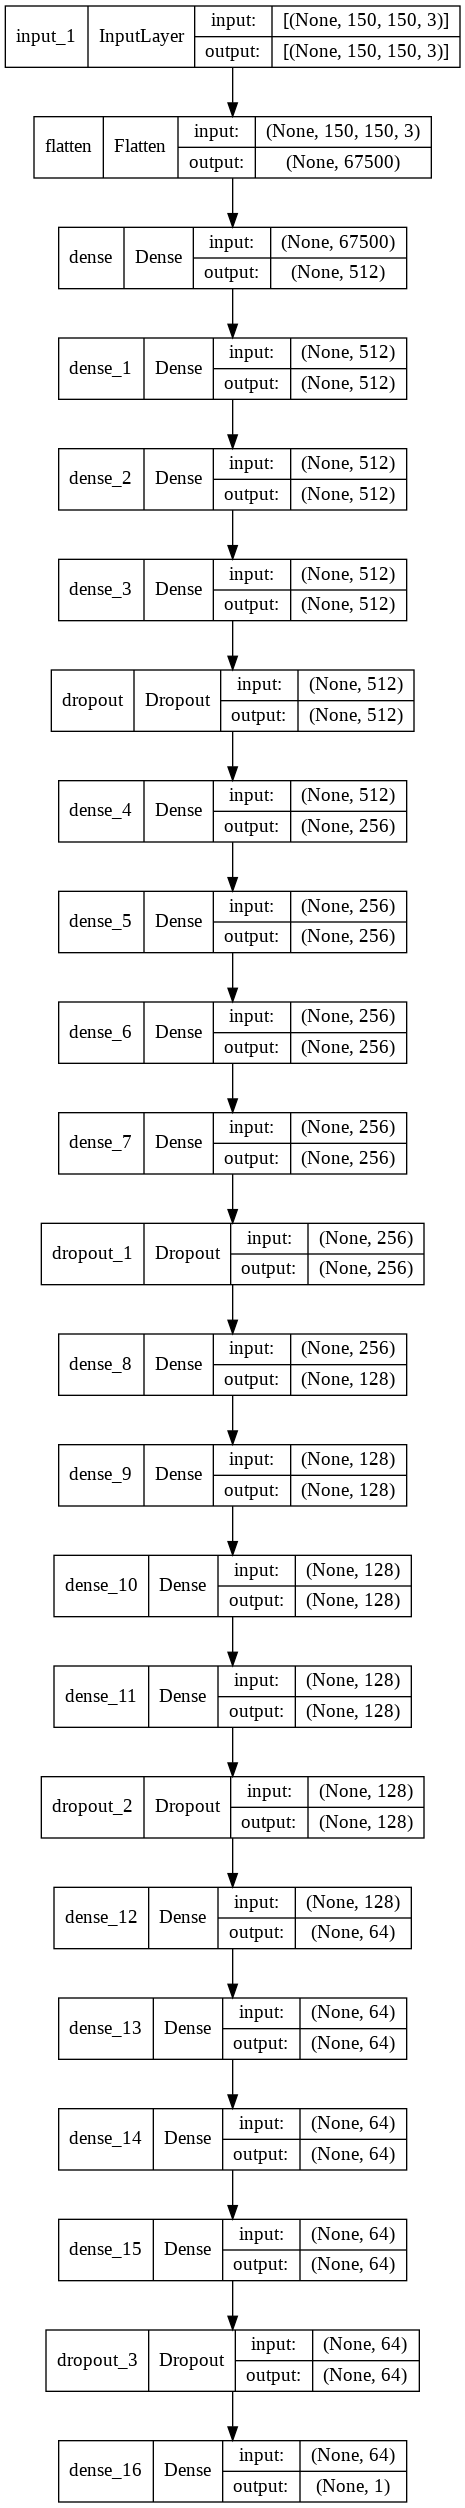

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

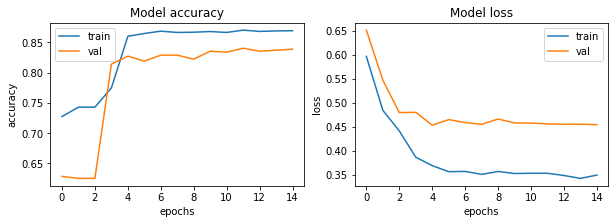

In [ ]:

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(hist.history[met])
    ax[i].plot(hist.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])


TEST METRICS ----------------------
Accuracy: 83.01282051282051%
Precision: 85.85858585858585%
Recall: 87.17948717948718%
F1-score: 86.51399491094148

TRAIN METRIC ----------------------
Train acc: 86.1
CONFUSION MATRIX ------------------
[[178  56]
 [ 50 340]]


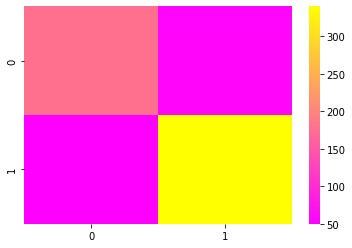

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

preds = model.predict(test_data)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()



print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

print('\nTRAIN METRIC ----------------------')
print('Train acc: {}'.format(np.round((hist.history['accuracy'][-1])*100, 2)))

print('CONFUSION MATRIX ------------------')
print(cm)
sns.heatmap(cm,cmap='spring')

In [ ]:
# CONVERTING MODEL IN TFLITE FORMAT WHICH CAN BE DEPLOYED ON THE FLUTTER APP
model_json = model.to_json()
with open("/content/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("/content/model.h5")
print("Saved model to disk")
 

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  display(Image(filename))
except Exception as err:
  print(str(err))